In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
print(tf.__version__)

2.0.0


In [33]:
fashion_mnist = keras.datasets.fashion_mnist

In [34]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [35]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
test_images.shape

(10000, 28, 28)

Preprocessing the data

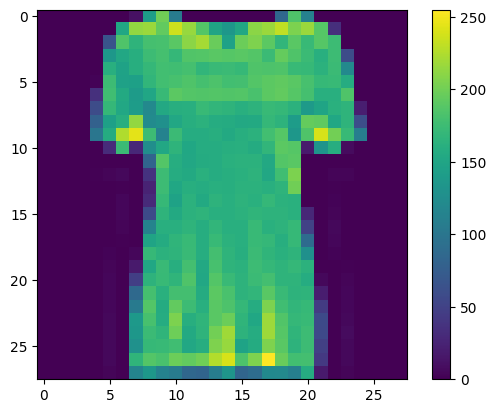

In [39]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

Making sure that the images are preprocessed as they range from 0-255. Both train and test images need to be rescaled

In [40]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Displays the first 25 images and labels for them

<function matplotlib.pyplot.show(close=None, block=None)>

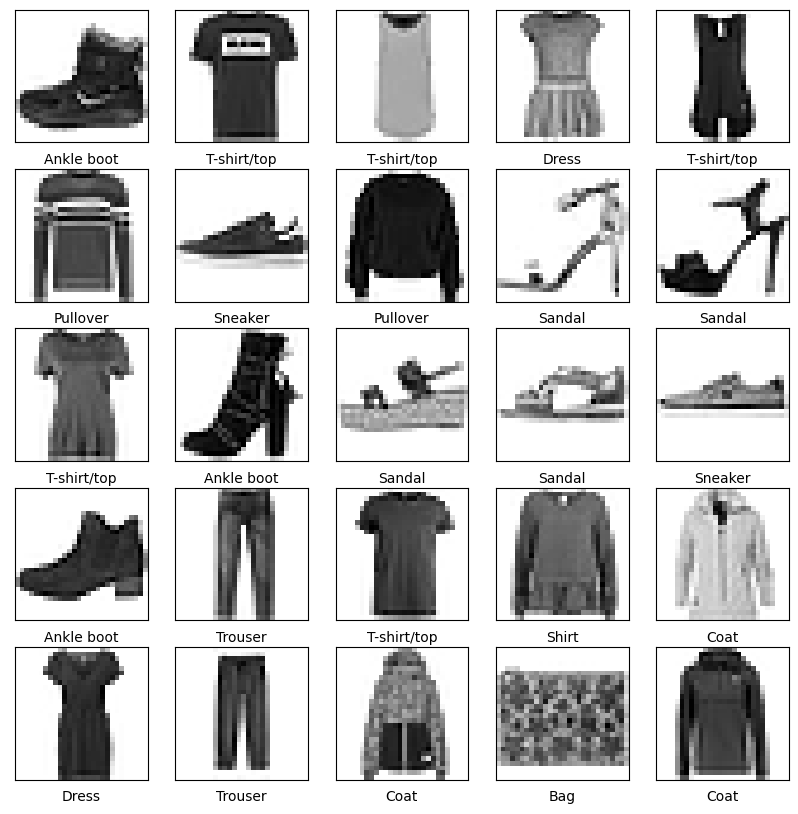

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4927 - accuracy: 0.8270
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3760 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3376 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3121 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2922 - accuracy: 0.8919
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2787 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2665 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2553 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2474 - accuracy: 0.9068
Epoch

In [45]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Since the test accuracy is lower than the training Accuracy there is overfitting going on in the model.

In [46]:
predictions = model.predict(test_images)

In [47]:
predictions[0]

array([2.3114568e-08, 3.9200366e-08, 5.1858674e-08, 1.4420466e-08,
       3.9343872e-06, 5.3585866e-03, 9.9855561e-06, 2.0238325e-02,
       6.1887857e-07, 9.7438848e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

In [50]:
def plot_image(i, predictions_array,true_label,img):
    predictions_array,true_label,img =predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color ='blue'
    else:
        color = 'red'

    plt.xlabel('{} {:2.0f}%({})'.format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#77777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

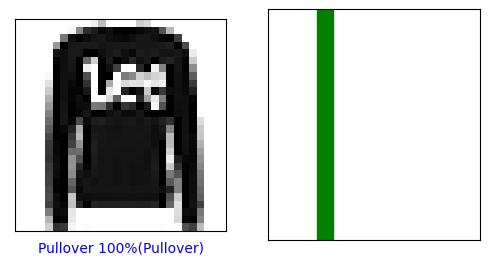

In [53]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

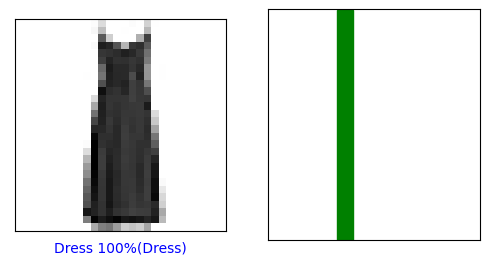

In [54]:
i = 13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

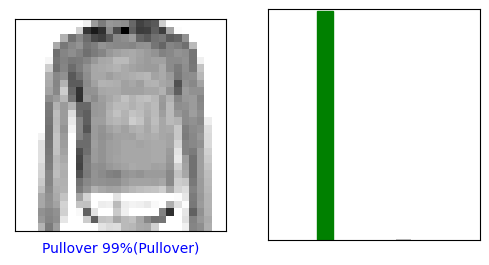

In [55]:
i = 16
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

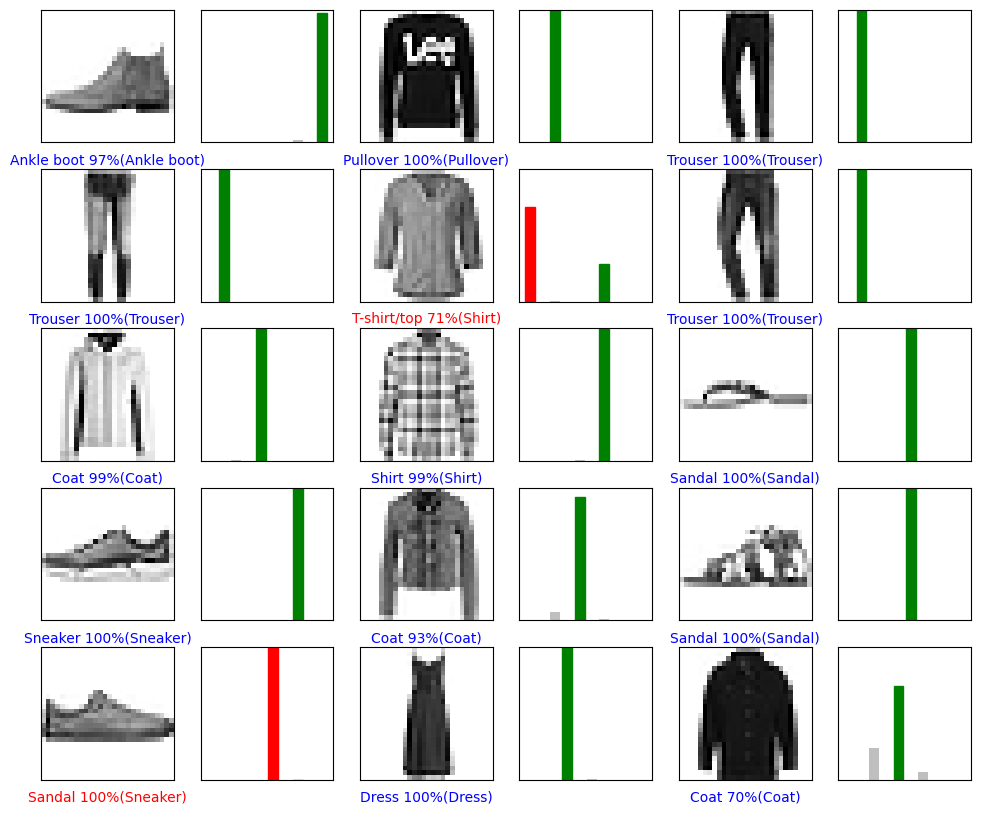

In [58]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()

In [59]:
img = test_images[0]
print(img.shape)

(28, 28)


In [60]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [61]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.31145219e-08 3.92001418e-08 5.18585743e-08 1.44204115e-08
  3.93438313e-06 5.35857584e-03 9.98557516e-06 2.02383101e-02
  6.18879142e-07 9.74388480e-01]]


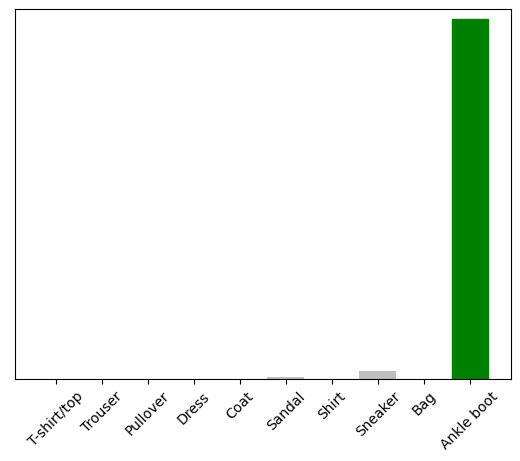

In [62]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [63]:
np.argmax(predictions_single[0])

9